In [3]:
from torch.utils.data import Dataset
from PIL import Image
import os
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [4]:
if os.path.isfile('split_file.csv') is False:
    with open('data/land_cover_representation/metadata.csv') as f:
        metadata = pd.read_csv(f)
    metadata = metadata[metadata['split_str'] == 'train']

    # # Shuffle the rows
    # metadata = metadata.sample(frac=1).reset_index(drop=True)

print(len(metadata))

print(metadata['y'].isnull().sum())

244471
0


In [1]:
from utils.dataload import LandClassDataset

In [2]:
import torchvision.transforms as T

transform = T.Compose([
    T.Resize((100, 100)),
    T.ToTensor()
])

dataset = LandClassDataset('data/land_cover_representation', transform=transform)

In [3]:
print(dataset.get_num_classes())

19


In [31]:
print(dataset[0])
print(type(dataset[0][0]))


(tensor([[[0.6824, 0.6824, 0.6824,  ..., 0.7294, 0.7294, 0.7294],
         [0.6824, 0.6824, 0.6824,  ..., 0.7294, 0.7294, 0.7294],
         [0.6824, 0.6824, 0.6824,  ..., 0.7294, 0.7294, 0.7294],
         ...,
         [0.5373, 0.5373, 0.5373,  ..., 0.7255, 0.7255, 0.7255],
         [0.5373, 0.5373, 0.5373,  ..., 0.7255, 0.7255, 0.7255],
         [0.5373, 0.5373, 0.5373,  ..., 0.7255, 0.7255, 0.7255]],

        [[0.6471, 0.6471, 0.6471,  ..., 0.6941, 0.6941, 0.6941],
         [0.6471, 0.6471, 0.6471,  ..., 0.6941, 0.6941, 0.6941],
         [0.6471, 0.6471, 0.6471,  ..., 0.6941, 0.6941, 0.6941],
         ...,
         [0.4745, 0.4745, 0.4745,  ..., 0.6824, 0.6824, 0.6824],
         [0.4745, 0.4745, 0.4745,  ..., 0.6824, 0.6824, 0.6824],
         [0.4745, 0.4745, 0.4745,  ..., 0.6824, 0.6824, 0.6824]],

        [[0.5647, 0.5647, 0.5647,  ..., 0.6353, 0.6353, 0.6353],
         [0.5647, 0.5647, 0.5647,  ..., 0.6353, 0.6353, 0.6353],
         [0.5647, 0.5647, 0.5647,  ..., 0.6353, 0.6353, 0

RGB Shape: (100, 100, 3)
Single channel shape: (100, 100)
[69 69 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61
 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61
 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61
 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61
 61 61 61 61]


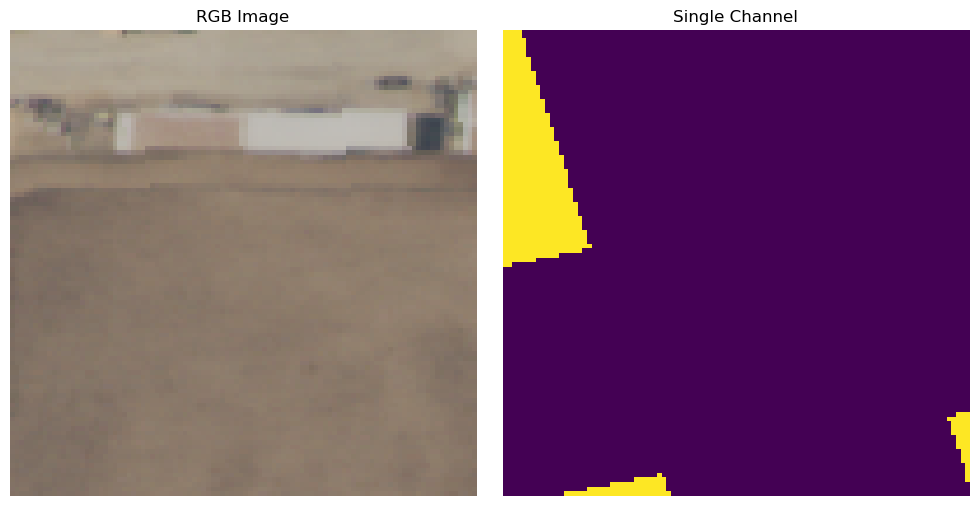

[[69 69 69 ... 61 61 61]
 [69 69 69 ... 61 61 61]
 [69 69 69 ... 61 61 61]
 ...
 [61 61 61 ... 61 61 61]
 [61 61 61 ... 61 61 61]
 [61 61 61 ... 61 61 61]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# Load the tile data
tile = np.load('data/land_cover_representation/tiles/0neighbor.npy')
print("RGB Shape:", tile[:, :, :3].shape)
print("Single channel shape:", tile[:, :, 4].shape)
print(st.mode(tile[:, :, 4]).mode)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the RGB image in the first subplot
axs[0].imshow(tile[:, :, :3])
axs[0].set_title("RGB Image")
axs[0].axis('off')  # Turn off axis for better visualization

# Display the single channel as a grayscale image in the second subplot
axs[1].imshow(tile[:, :, 4])
axs[1].set_title("Single Channel")
axs[1].axis('off')  # Turn off axis

# Show the figure
plt.tight_layout()
plt.show()

print(tile[:, :, 4])

In [44]:
# Initialize an empty set to collect unique labels
unique_labels = set()

# Loop through the dataset to collect labels
for i, (_, label) in enumerate(dataset):
    unique_labels.add(label)
    if (i+1) % 10000 == 0:
        break

# Convert the set to a sorted list (optional) for easier viewing
unique_labels = sorted(unique_labels)
print("Unique labels in the dataset:", unique_labels)
print(len(unique_labels))

Unique labels in the dataset: [1, 2, 4, 21, 22, 24, 28, 33, 36, 37, 42, 49, 54, 61, 66, 67, 69, 71, 72, 75, 76, 77, 111, 121, 122, 123, 124, 131, 141, 142, 152, 176, 190, 195, 204, 205, 206, 208, 209, 211, 212, 217, 220, 225, 226, 227, 236, 237]
48
